<a href="https://colab.research.google.com/github/HanYang-AI/HYAI/blob/main/4_K_Nearest_Neighbor_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/NBA Hall of Famers 2021.csv")

In [176]:
new_df = df

In [179]:
new_df = df.loc[df['weight'] < 200]

In [180]:
x=new_df.loc[:, ["height", "weight"]]
y=new_df.loc[:, "position"]

x = np.array(x)
y = np.array(y)

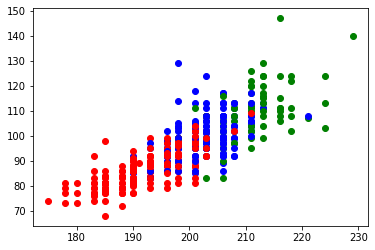

In [181]:
import matplotlib.pyplot as plt

for val, inp in enumerate(x):
  if y[val] == 'G':
    plt.scatter(inp[0], inp[1], c='r')
  elif y[val] == 'C':
    plt.scatter(inp[0], inp[1], c='g')
  else:
    plt.scatter(inp[0], inp[1], c='b')

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.33, random_state=42)

In [184]:
import math

def get_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i])**2
    return math.sqrt(distance)

In [185]:
import numpy as np

def knn(new, x, y, k):
    neighbor_distance = []
    for i in x:
        neighbor_distance.append(get_distance(new, i))
    
    sorted = np.sort(neighbor_distance)
    sorted_idx = np.argsort(neighbor_distance)

    y_sorted = [y[i] for i in sorted_idx]

    return max(y_sorted[:k], key=y_sorted[:k].count)

In [186]:
def gridsearch(k_parameters):
    total = 0
    best = 0
    idx = 0
    for i in k_parameters:
        for j in range(len(x_validation)):
            total += y_validation[j] == knn(x_validation[j], x_train, y_train, i)
        if total/len(x_validation) > best:
            best = total/len(x_validation)
            idx = i
        total = 0

    print(f"k가 {idx}일 때 {best} 의 정확도로 제일 높습니다.")

In [162]:
params = [i for i in range(1, 200)]
gridsearch(params)

k가 19일 때 0.7310344827586207 의 정확도로 제일 높습니다.


In [187]:
import random
x_sample = []
for i in range(4000):
    x_sample.append([random.uniform(170, 230), random.uniform(50, 150)])

print(x_sample)

[[218.79628609113573, 51.70646723852603], [176.77465452301408, 145.68380111131674], [176.80889141314762, 112.06128876755649], [223.78702264574423, 51.138485626382554], [191.01038584821984, 136.25201353097654], [227.96375725785973, 147.64460503251547], [200.11427383641134, 66.74283400545205], [227.35492793371736, 67.73394376329652], [175.37498613562224, 63.575019903379896], [202.36104862157023, 128.82673309593866], [201.3117853909307, 76.46444205242287], [172.952481357397, 91.18134081459516], [197.02876304583813, 137.4501998780952], [228.22296021545228, 127.13421166781484], [195.99443209054797, 61.06181897428723], [193.19770100091208, 103.36743617762505], [172.60232017588325, 104.07413533552884], [176.48723279980302, 56.34007714200485], [225.9890692852442, 70.1428087074686], [224.93340684342803, 52.1842392131441], [201.4196658407807, 135.48563326008014], [207.08451381229492, 71.31707330571682], [224.74291173997045, 72.62623012627685], [181.4450965700267, 76.34719128786347], [221.4508567

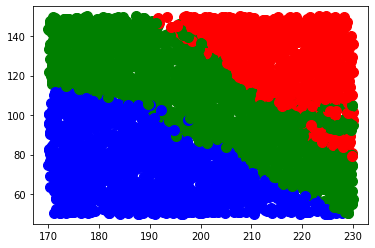

In [164]:
import matplotlib.pyplot as plt

for i in range(len(x_sample)):
    if knn(x_sample[i], x_train, y_train,  19) == 'C':
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='r')
    elif knn(x_sample[i], x_train, y_train,  19) == 'F':
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='g')
    else:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='b')

In [188]:
a = float(input('키를 입력해주세요: '))
b = float(input('몸무게를 입력해주세요: '))
print('당신에게 추천하는 포지션은', knn([a, b], x, y, 20), '입니다')

키를 입력해주세요: 210
몸무게를 입력해주세요: 115
당신에게 추천하는 포지션은 C 입니다
